# **Importing libraries and data**

In [2]:
import csv
import math
import pickle
import datetime as dt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import sklearn

from scipy import stats
from dateutil.parser import parse
from datetime import datetime
from IPython.display import display_html
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from yellowbrick.regressor import ResidualsPlot
from sklearn import linear_model
from pprint import pprint

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.style.use('fivethirtyeight')

import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button style="color:"black";right:75%;" onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [3]:
################################################################################# USER DEFINED FIELDS ###########################################################################################
#################################################################################################################################################################################################
####### Load ADS using name and path

load_ads = pd.read_csv('gs://aes-datahub-0002-curated/Outage_Restoration/DPL_Curated_Datasets/General_Preparedness_ADS_v2.csv')
load_ads = load_ads.drop(columns = ['Unnamed: 0','Total_cust'])
print(load_ads.shape)
load_ads = load_ads[load_ads.OUTAGE_ID != 0]
print(load_ads.shape)

display(load_ads.head())

(2246, 67)
(2246, 67)


,DATE,OUTAGE_ID,cldCvrAvg,cldCvrMax,cldCvrMin,dewPtAvg,dewPtMax,dewPtMin,feelsLikeAvg,feelsLikeMax,feelsLikeMin,heatIndexAvg,heatIndexMax,heatIndexMin,mslPresAvg,mslPresMax,mslPresMin,precip,radSolarAvg,radSolarMax,radSolarMin,radSolarTot,relHumAvg,relHumMax,relHumMin,sfcPresAvg,sfcPresMax,sfcPresMin,snowfall,spcHumAvg,spcHumMax,spcHumMin,tempAvg,tempMax,tempMin,wetBulbAvg,wetBulbMax,wetBulbMin,windChillAvg,windChillMax,windChillMin,windDir100mAvg,windDir80mAvg,windDirAvg,windSpd100mAvg,windSpd100mMax,windSpd100mMin,windSpd80mAvg,windSpd80mMax,windSpd80mMin,windSpdAvg,windSpdMax,windSpdMin,Month,Week,weekday,Weekend_flag,Month_Sin,Month_Cos,Week_Sin,Week_Cos,Ice,Thunderstorm,Wind,Lightning,Clear_Sky,Snow
0,2007-02-13,157,100.000000,100.0,99.0,24.888535,28.8,9.6,15.590446,22.0,-5.4,28.421019,33.2,13.6,1012.894268,1023.6,1004.4,1.43,29.049045,154.9,0.0,711.9,86.471975,93.9,76.9,975.732484,990.5,961.0,20.77,2.943312,3.5,1.5,28.421019,33.2,13.6,27.214013,31.3,12.7,15.590446,22.0,-5.4,54.006369,54.191083,52.184713,21.297452,27.6,15.2,21.477707,28.1,15.4,19.224841,25.0,12.9,2,7,Tuesday,False,0.866025,0.5,0.748511,0.663123,True,False,False,False,False,False
1,2007-02-14,71,96.887324,100.0,7.0,8.742254,18.9,-8.4,-2.629577,6.7,-15.6,13.363380,21.8,-3.8,1018.430986,1024.7,1006.1,0.06,150.360563,611.3,0.0,3683.3,81.628169,90.4,71.0,979.438028,993.1,965.6,1.80,1.477465,2.3,0.6,13.363380,21.8,-3.8,12.335211,21.0,-4.3,-2.629577,6.7,-15.6,341.957746,342.070423,340.323944,18.849296,26.8,7.8,19.060563,27.3,7.9,16.445070,24.2,5.4,2,7,Wednesday,False,0.866025,0.5,0.748511,0.663123,True,False,False,False,False,False
2,2007-02-15,46,42.130435,98.0,2.0,0.593478,13.4,-20.4,-6.210870,7.2,-22.6,6.163043,19.9,-14.0,1024.023913,1025.4,1021.8,0.00,163.110870,669.2,0.0,4019.6,77.460870,91.0,71.0,985.228261,992.1,979.9,0.00,1.039130,1.8,0.3,6.163043,19.9,-14.0,5.206522,18.2,-14.4,-6.210870,7.2,-22.6,288.717391,288.608696,284.695652,10.319565,15.7,2.3,10.445652,15.8,2.3,8.469565,13.9,1.6,2,7,Thursday,False,0.866025,0.5,0.748511,0.663123,True,False,False,False,False,False
3,2007-02-24,66,67.136364,100.0,1.0,18.962121,31.4,11.8,17.945455,28.3,5.8,28.948485,37.7,18.1,1023.327273,1029.5,1012.0,0.44,148.528788,640.7,0.0,3868.9,67.624242,88.7,39.0,988.000000,996.5,967.4,0.40,2.307576,3.8,1.7,28.948485,37.7,18.1,26.089394,34.0,16.6,17.945455,28.3,5.8,100.257576,100.272727,99.075758,17.116667,29.1,9.5,17.318182,29.5,9.6,14.957576,26.4,7.8,2,8,Saturday,True,0.866025,0.5,0.822984,0.568065,True,False,False,False,False,False
4,2007-02-25,72,94.500000,100.0,54.0,36.202778,43.2,27.0,32.179167,47.5,20.1,40.391667,52.0,30.3,1004.123611,1015.3,999.3,0.32,50.544444,523.1,0.0,1671.5,85.050000,96.8,71.4,969.897222,980.9,953.6,0.00,4.700000,6.2,3.2,40.391667,52.0,30.3,38.513889,47.6,29.3,32.179167,47.5,20.1,166.680556,166.958333,161.097222,19.454167,30.7,10.4,19.716667,31.0,10.4,16.191667,27.2,7.8,2,8,Sunday,True,0.866025,0.5,0.822984,0.568065,True,False,False,False,False,False


In [4]:
######################################################################## ALL USER DEFINED FUNCTION ARE LOGGED HERE #############################################################################
################################################################################################################################################################################################

# calculate rmse scores
def rmse(pred_test, y_test):
    return np.sqrt(((pred_test - y_test) ** 2).mean())

# calculate mape scores
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# get names of all categorical data present in data
def get_index_of_categorical_columns(df):
    cols = df.columns
    num_cols = df._get_numeric_data().columns
    return list(set(cols) - set(num_cols))


def do_union(lst1, lst2): 
    final_list = list(set(lst1) | set(lst2))
    return final_list 

def segment(x):
    if(x<=5000):
        return "0-5000"
    elif(x<=10000):
        return "5000-10000"
    elif(x<=15000):
        return "10000-15000"
    elif(x<=20000):
        return "15000-20000"
    elif(x<=25000):
        return "20000-25000"
    elif(x<=30000):
        return "25000-30000"
    else:
        return ">30000"
    
def style_diag(data):
    diag_mask = pd.DataFrame("", index=data.index, columns=data.columns)
    min_axis = min(diag_mask.shape)
    diag_mask.iloc[range(min_axis), range(min_axis)] = 'background-color:#aed581'
    return diag_mask

def customer_metrics(y_test,y_test_pred):
    df_pred = pd.DataFrame(data={'actualRaw': y_test, 'predictedRaw': y_test_pred})
    df_pred['Actual_segment'] = df_pred['actualRaw'].apply(segment)
    df_pred['Prediction_segment'] = df_pred['predictedRaw'].apply(segment)
    business_KPI = df_pred[['Actual_segment','Prediction_segment']]

    #conversion to percentage
    business_KPI = pd.pivot_table(business_KPI, index='Actual_segment',columns=['Prediction_segment'], values='Actual_segment', aggfunc=lambda x: len(x))
    business_KPI["total"] =  business_KPI.sum(axis=1)
    business_KPI.columns.name = 'Predicted_Values'
    business_KPI.index.name = 'Actual_Values'

    # Add the grand total row, summing all values in a column
    business_KPI.loc['total', :] = business_KPI.sum()
    business_KPI = business_KPI.round(0)
    return business_KPI

# Preprocessing Data 

## Columns with Categorical Values

In [5]:
object_columns = load_ads.loc[:, (load_ads.dtypes == object) | (load_ads.dtypes == bool)]
print(list(object_columns.columns))

['DATE', 'weekday', 'Weekend_flag', 'Ice', 'Thunderstorm', 'Wind', 'Lightning', 'Clear_Sky', 'Snow']


## Dummifying Categorical Variables

In [6]:
################################################################################# USER DEFINED FIELDS ###########################################################################################
################################################################################################################################################################################################

ads = load_ads[:]

ads = pd.get_dummies(ads, columns=[s for s in list(object_columns.columns) if s != 'DATE'])

## Printing all the columns after dummifying

In [7]:
# print list of columns present in the ads and drop na's from the dataset
print(list(ads.columns))
ads.dropna(inplace=True)
print(ads.shape)

['DATE', 'OUTAGE_ID', 'cldCvrAvg', 'cldCvrMax', 'cldCvrMin', 'dewPtAvg', 'dewPtMax', 'dewPtMin', 'feelsLikeAvg', 'feelsLikeMax', 'feelsLikeMin', 'heatIndexAvg', 'heatIndexMax', 'heatIndexMin', 'mslPresAvg', 'mslPresMax', 'mslPresMin', 'precip', 'radSolarAvg', 'radSolarMax', 'radSolarMin', 'radSolarTot', 'relHumAvg', 'relHumMax', 'relHumMin', 'sfcPresAvg', 'sfcPresMax', 'sfcPresMin', 'snowfall', 'spcHumAvg', 'spcHumMax', 'spcHumMin', 'tempAvg', 'tempMax', 'tempMin', 'wetBulbAvg', 'wetBulbMax', 'wetBulbMin', 'windChillAvg', 'windChillMax', 'windChillMin', 'windDir100mAvg', 'windDir80mAvg', 'windDirAvg', 'windSpd100mAvg', 'windSpd100mMax', 'windSpd100mMin', 'windSpd80mAvg', 'windSpd80mMax', 'windSpd80mMin', 'windSpdAvg', 'windSpdMax', 'windSpdMin', 'Month', 'Week', 'Month_Sin', 'Month_Cos', 'Week_Sin', 'Week_Cos', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'Weekend_flag_False', 'Weekend_flag_True', 

# Distribution and transformation of Y-variable

## Target Variable Analysis: Is it Normal?

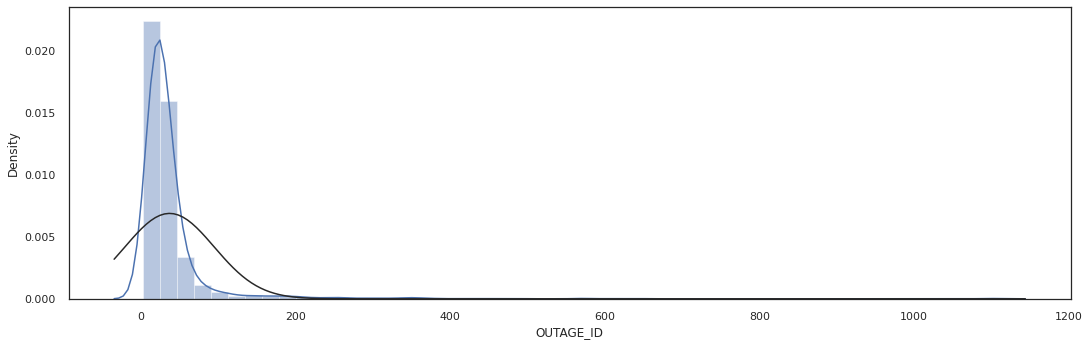

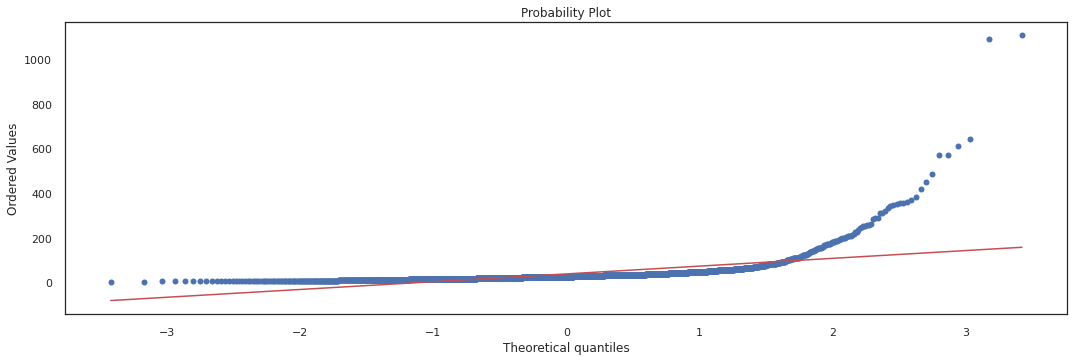

In [8]:
from scipy.stats import norm

sns.set(rc={'figure.figsize':(16,5)})
sns.set_style("white")

sns.distplot(ads['OUTAGE_ID'],fit=norm);
fig = plt.figure()
res = stats.probplot(ads['OUTAGE_ID'], plot=plt)

#### **Outlier Treatment using z scores**

Total Storm Days:  76
Storm Days after Removing outlier using a z score of 3:  74
Value at z score of 3:  842
Total data points after removing Outliers: 2244


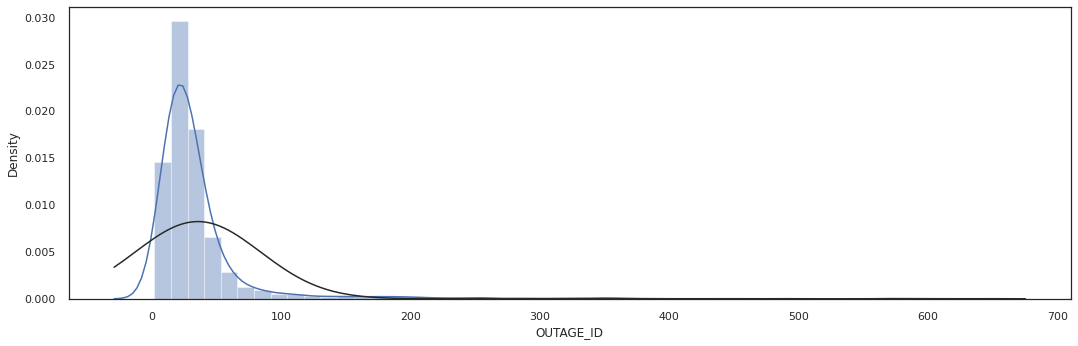

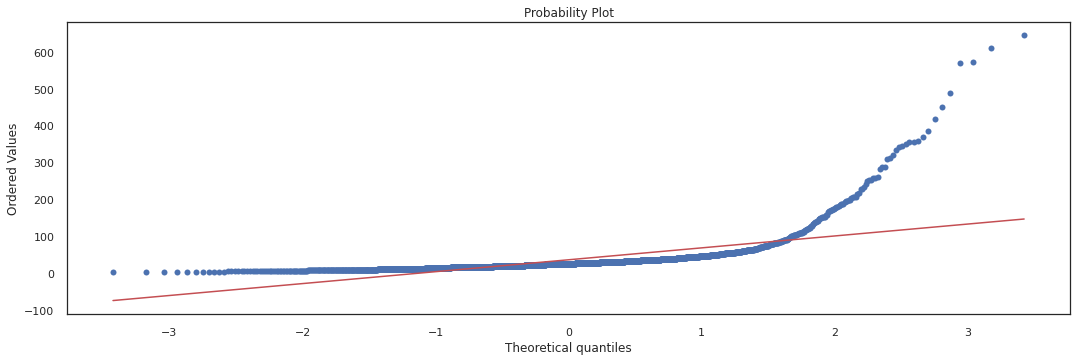

In [9]:
ex = ads[ads.Clear_Sky_False == 1]

print('Total Storm Days: ', len(ex))
upper = ex['OUTAGE_ID'].mean() + 3 * ex['OUTAGE_ID'].std()
print('Storm Days after Removing outlier using a z score of 3: ', len(ex[ex['OUTAGE_ID'] < upper]))
print('Value at z score of 3: ', round(upper))
ads = ads[ads['OUTAGE_ID'] < upper]

print('Total data points after removing Outliers:', len(ads))

sns.set(rc={'figure.figsize':(16,5)})
sns.set_style("white")

sns.distplot(ads['OUTAGE_ID'],fit=norm);
fig = plt.figure()
res = stats.probplot(ads['OUTAGE_ID'], plot=plt)

#### **Log Transformation of Tanget Variable (TTR)**

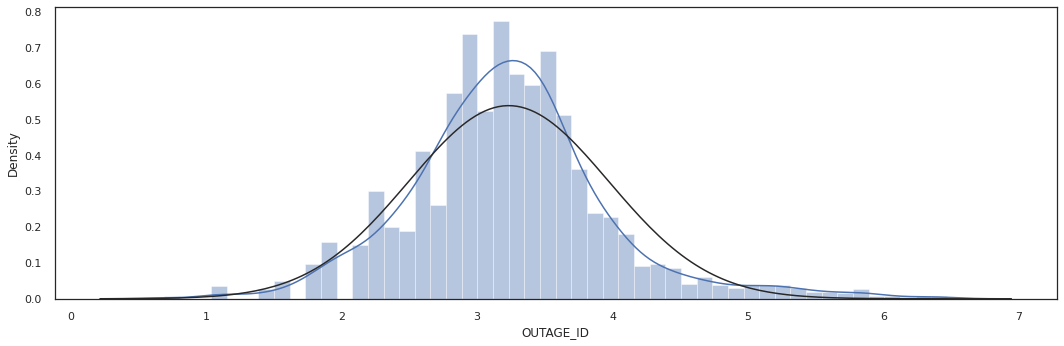

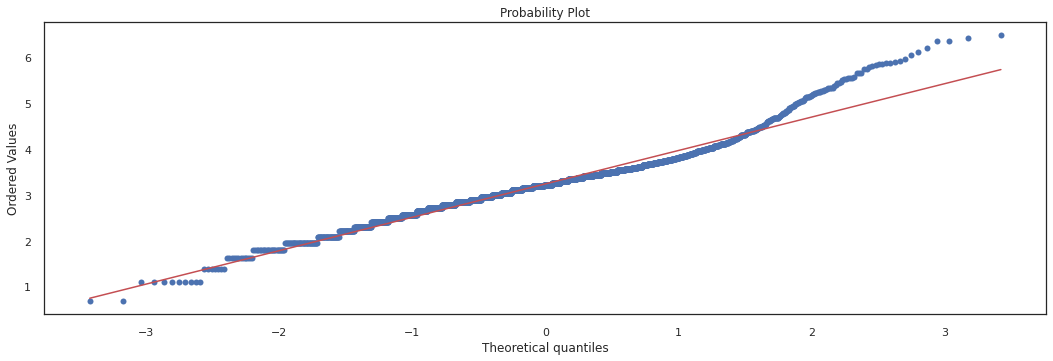

In [10]:
# Apply log e tranformation to the dataset
ads['OUTAGE_ID'] = np.log(ads['OUTAGE_ID'])
from scipy.stats import norm

sns.set(rc={'figure.figsize':(16,5)})
sns.set_style("white")

sns.distplot(ads['OUTAGE_ID'],fit=norm);
fig = plt.figure()
res = stats.probplot(ads['OUTAGE_ID'], plot=plt)

# Feature Selection using different Models

In [11]:
%%time

#########################################################################################################################################################################################################
######################################################################## FEATURE SELECTION : MAX VOTING REGIME ##########################################################################################

X = ads.drop(['OUTAGE_ID','DATE'],axis=1)
y = ads['OUTAGE_ID']

# ols = LinearRegression()
# ols.fit(X.values, y.values)
# pls = PLSRegression(n_components=15)
# pls.fit(X.values, y.values)
rf = RandomForestRegressor(n_estimators=150, n_jobs = -1)
rf.fit(X,y)
xg = xgb.XGBRegressor(n_jobs=-1, max_depth=15)
xg.fit(X,y)
print('')


CPU times: user 20.4 s, sys: 73.5 ms, total: 20.5 s
Wall time: 4.4 s


In [12]:
# ols_reg = pd.DataFrame({'Features': X.columns, 'Importance_Score_ols': ols.coef_}).sort_values(by='Importance_Score_ols',ascending=False)
# pls_reg = pd.DataFrame({'Features': X.columns, 'Importance_Score_PLS': pls.coef_.ravel()}).sort_values(by='Importance_Score_PLS',ascending=False)
rftrees = pd.DataFrame({'Features': X.columns, 'Importance_Score_Random_Forest': rf.feature_importances_}).sort_values(by='Importance_Score_Random_Forest',ascending=False)
xgboost = pd.DataFrame({'Features': X.columns, 'Importance_Score_XGBoost': xg.feature_importances_}).sort_values(by='Importance_Score_XGBoost',ascending=False)


# ols_reg.reset_index(drop=True,inplace=True)
# pls_reg.reset_index(drop=True,inplace=True)
rftrees.reset_index(drop=True,inplace=True)
xgboost.reset_index(drop=True,inplace=True)

# ols_reg = ols_reg.head(20)
# pls_reg = pls_reg.head(20)
rftrees = rftrees.head(20)
xgboost = xgboost.head(20)

## **Feature Importance using Random Forest**

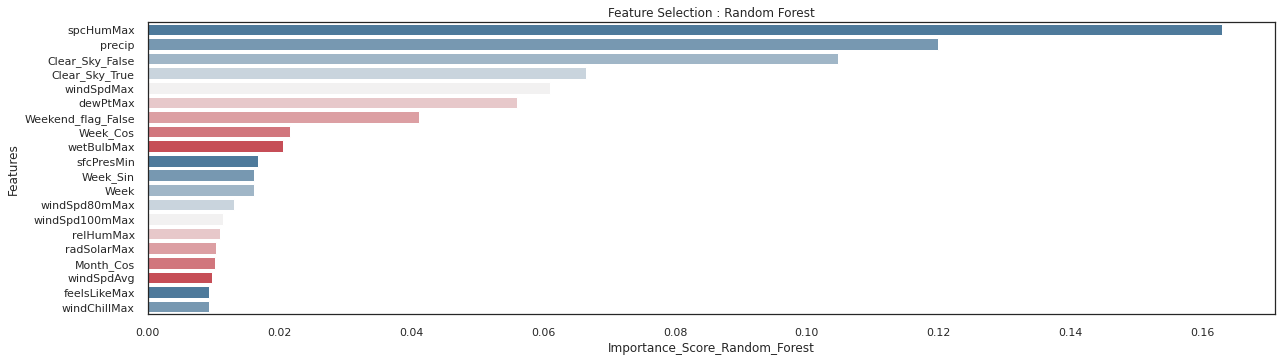

In [13]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style("white")
ax = sns.barplot(x="Importance_Score_Random_Forest", y="Features", data=rftrees, palette = sns.diverging_palette(240, 10, n=9)).set_title('Feature Selection : Random Forest')

In [14]:
display(rftrees)

,Features,Importance_Score_Random_Forest
0,spcHumMax,0.162953
1,precip,0.119984
2,Clear_Sky_False,0.104690
3,Clear_Sky_True,0.066468
4,windSpdMax,0.060971
5,dewPtMax,0.055953
6,Weekend_flag_False,0.041148
7,Week_Cos,0.021539
8,wetBulbMax,0.020474
9,sfcPresMin,0.016652


## **Feature Importance using XGBoost**

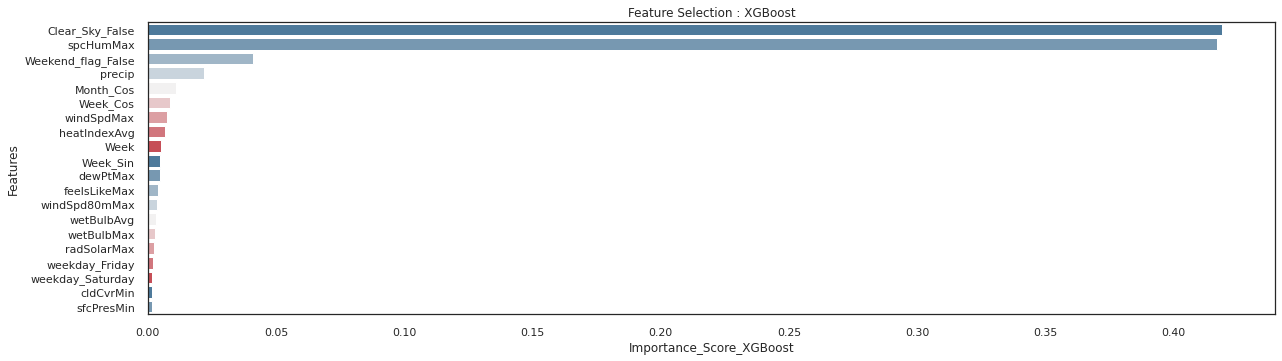

In [15]:
sns.set(rc={'figure.figsize':(18,5)})
sns.set_style("white")
ax = sns.barplot(x="Importance_Score_XGBoost", y="Features", data=xgboost, palette = sns.diverging_palette(240, 10, n=9)).set_title('Feature Selection : XGBoost')

In [16]:
display(xgboost)

,Features,Importance_Score_XGBoost
0,Clear_Sky_False,0.418798
1,spcHumMax,0.417140
2,Weekend_flag_False,0.041100
3,precip,0.022013
4,Month_Cos,0.010796
5,Week_Cos,0.008554
6,windSpdMax,0.007629
7,heatIndexAvg,0.006797
8,Week,0.005106
9,Week_Sin,0.004741


## **Final Features Selected after Union (Max Voting Regime)**

In [17]:
final_features = pd.DataFrame()
final_features['XG Boost'] = xgboost.Features
final_features['Random Forest'] = rftrees.Features

display(final_features)

final_features = do_union(list(xgboost.Features), list(rftrees.Features))
print("/n Features selected:")
print(len(final_features), "No. of Features Selected")
print(final_features)

,XG Boost,Random Forest
0,Clear_Sky_False,spcHumMax
1,spcHumMax,precip
2,Weekend_flag_False,Clear_Sky_False
3,precip,Clear_Sky_True
4,Month_Cos,windSpdMax
5,Week_Cos,dewPtMax
6,windSpdMax,Weekend_flag_False
7,heatIndexAvg,Week_Cos
8,Week,wetBulbMax
9,Week_Sin,sfcPresMin


/n Features selected:
25 No. of Features Selected
['windSpdAvg', 'Month_Cos', 'windChillMax', 'precip', 'Week_Cos', 'weekday_Saturday', 'spcHumMax', 'relHumMax', 'Week_Sin', 'weekday_Friday', 'sfcPresMin', 'heatIndexAvg', 'feelsLikeMax', 'Week', 'dewPtMax', 'wetBulbAvg', 'Clear_Sky_True', 'windSpd100mMax', 'radSolarMax', 'windSpd80mMax', 'wetBulbMax', 'windSpdMax', 'cldCvrMin', 'Clear_Sky_False', 'Weekend_flag_False']


### **View Data-set after feature selection**

In [18]:
ads_v1 = ads[final_features]
ads_v1['OUTAGE_ID'] = ads['OUTAGE_ID']
display(ads_v1.head())

,windSpdAvg,Month_Cos,windChillMax,precip,Week_Cos,weekday_Saturday,spcHumMax,relHumMax,Week_Sin,weekday_Friday,sfcPresMin,heatIndexAvg,feelsLikeMax,Week,dewPtMax,wetBulbAvg,Clear_Sky_True,windSpd100mMax,radSolarMax,windSpd80mMax,wetBulbMax,windSpdMax,cldCvrMin,Clear_Sky_False,Weekend_flag_False,OUTAGE_ID
0,19.224841,0.5,22.0,1.43,0.663123,0,3.5,93.9,0.748511,0,961.0,28.421019,22.0,7,28.8,27.214013,0,27.6,154.9,28.1,31.3,25.0,99.0,1,1,5.056246
1,16.445070,0.5,6.7,0.06,0.663123,0,2.3,90.4,0.748511,0,965.6,13.363380,6.7,7,18.9,12.335211,0,26.8,611.3,27.3,21.0,24.2,7.0,1,1,4.262680
2,8.469565,0.5,7.2,0.00,0.663123,0,1.8,91.0,0.748511,0,979.9,6.163043,7.2,7,13.4,5.206522,0,15.7,669.2,15.8,18.2,13.9,2.0,1,1,3.828641
3,14.957576,0.5,28.3,0.44,0.568065,1,3.8,88.7,0.822984,0,967.4,28.948485,28.3,8,31.4,26.089394,0,29.1,640.7,29.5,34.0,26.4,1.0,1,0,4.189655
4,16.191667,0.5,47.5,0.32,0.568065,0,6.2,96.8,0.822984,0,953.6,40.391667,47.5,8,43.2,38.513889,0,30.7,523.1,31.0,47.6,27.2,54.0,1,0,4.276666


### **Correlation Matrix of Selected Variables**

In [19]:
c = ads_v1.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending = False)
so.index = so.index.set_names(['Column1', 'column2'])
so = so[so>0.97]
delete_feature = []
for i in range(len(so.index)):
    if (so.index[i][0] != so.index[i][1]):
        if(delete_feature.count(so.index[i][0]) > 0):
            continue
        else:
            delete_feature.append(so.index[i][1])
ads_v1 = ads_v1.drop(columns = delete_feature)
delete_feature

['Clear_Sky_True',
 'feelsLikeMax',
 'heatIndexAvg',
 'windSpd100mMax',
 'wetBulbMax',
 'wetBulbMax',
 'heatIndexAvg',
 'wetBulbMax',
 'feelsLikeMax',
 'wetBulbAvg',
 'wetBulbAvg']

<AxesSubplot:>

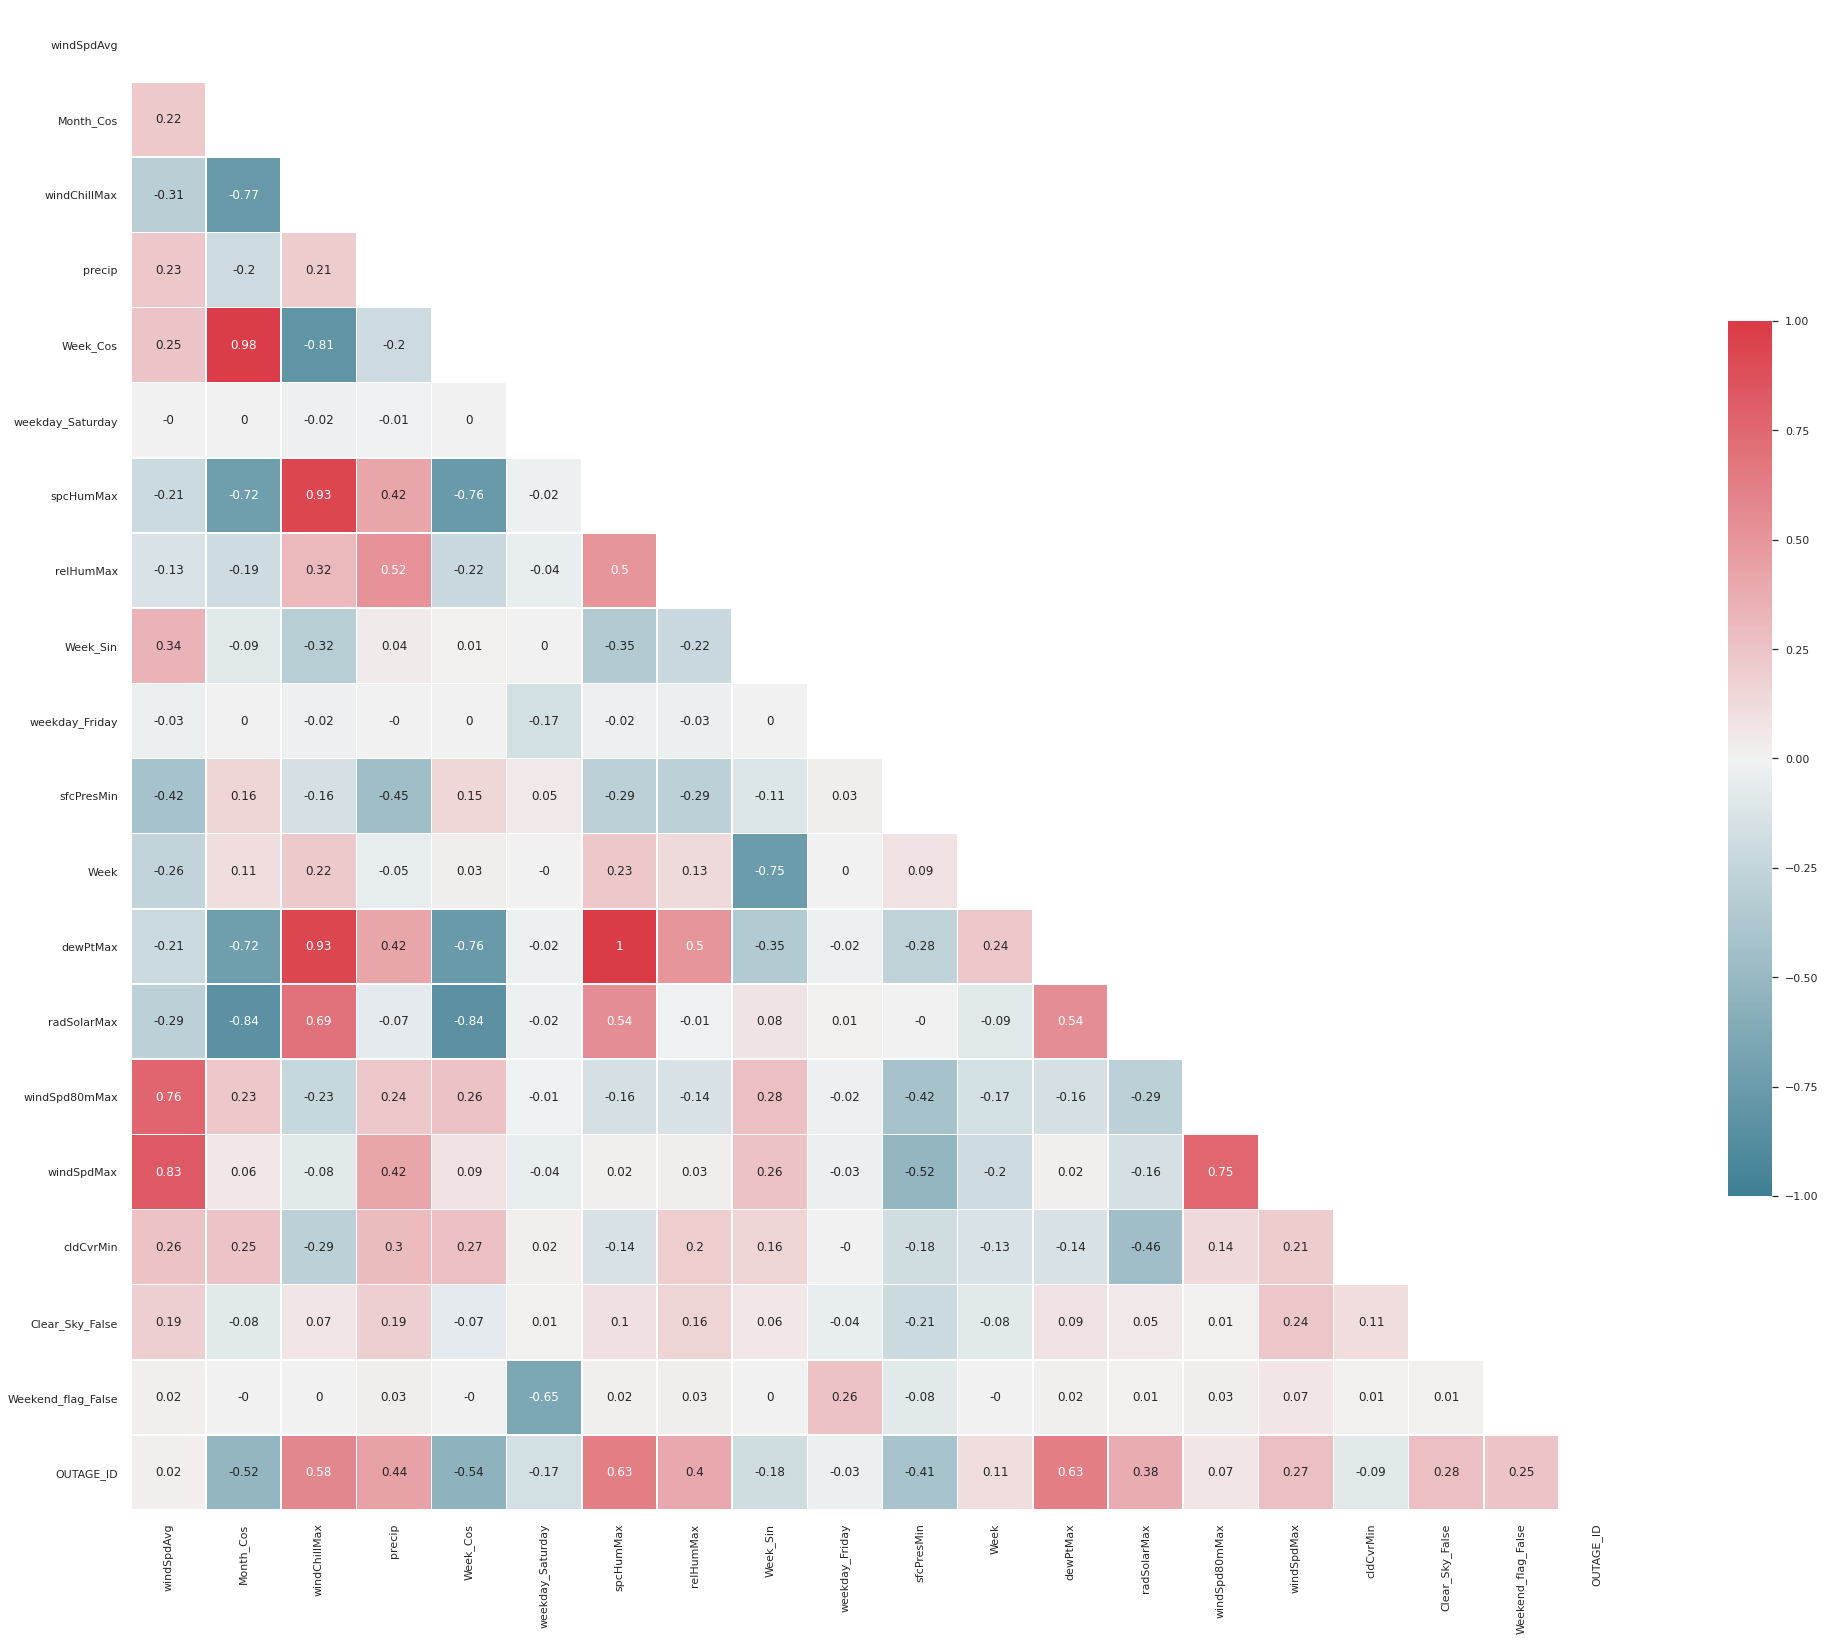

In [20]:
#whitegrid
sns.set_style('whitegrid')
#compute correlation matrix...
corr_matrix=ads_v1.corr(method='spearman')
#...and show it with a heatmap
#first define the dimension
plt.figure(figsize=(30,30))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(round(corr_matrix,2), mask=mask, cmap=cmap, center=0, vmax=1, vmin =-1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### **BoxPlot of selected Variables**

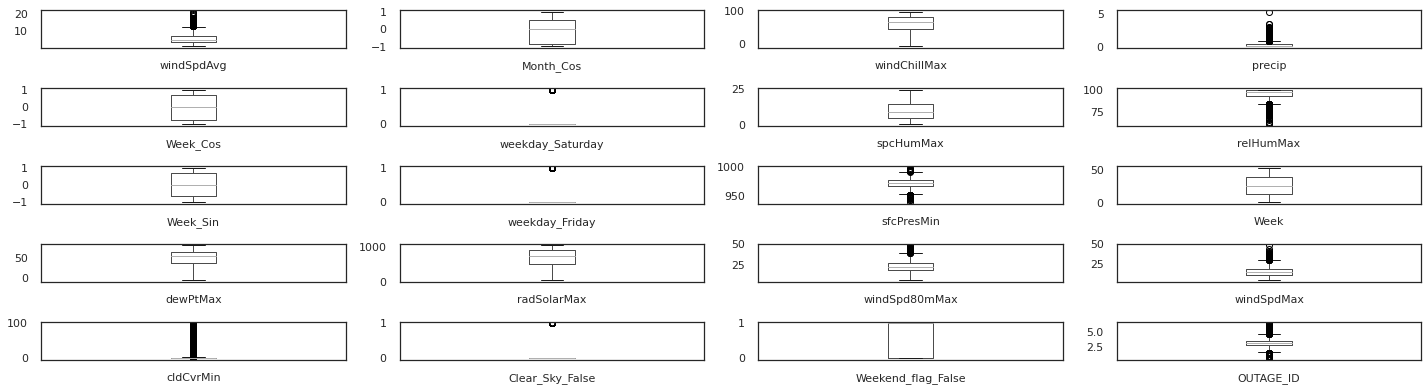

In [21]:
sns.set(rc={'figure.figsize':(20,15)})
sns.set_style("white")
for i, col in enumerate(list(ads_v1.columns.values)):
    plt.subplot(14,4,i+1)
    ads_v1.boxplot(col)
    plt.grid()
    plt.tight_layout()

### **Distribution Plot of selected Variables**

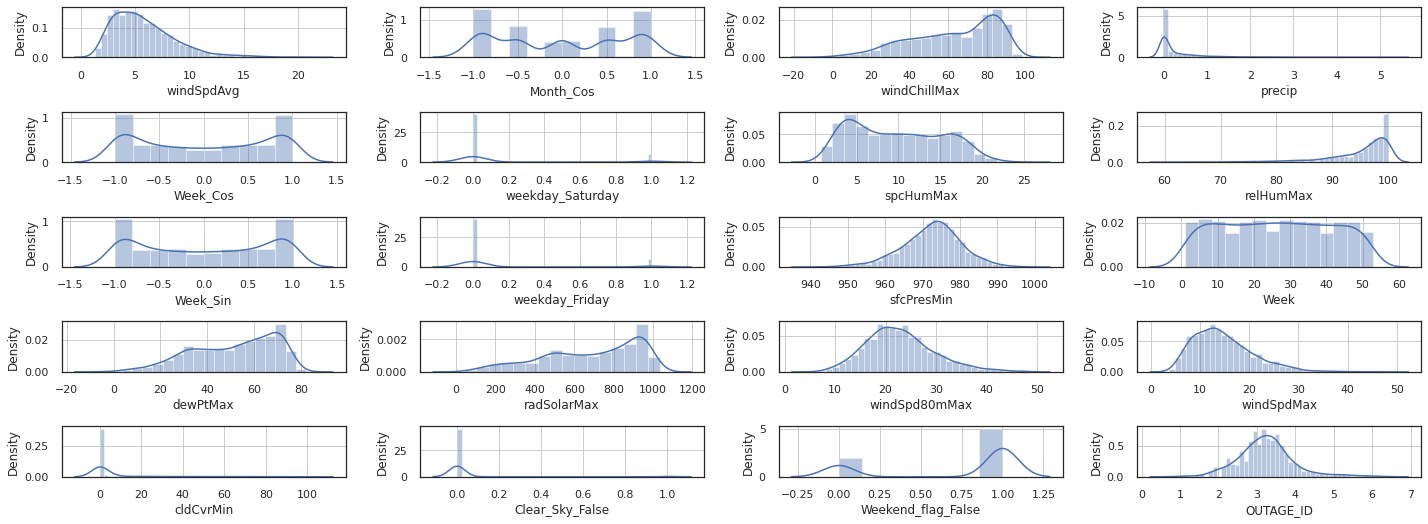

In [22]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set_style("white")
for i, col in enumerate(list(ads_v1.columns.values)):
    plt.subplot(14,4,i+1)
    sns.distplot(ads_v1[col], color='b', kde=True, label='data')
    plt.grid()
    plt.tight_layout()

# **Train-Test Split using sklearn**

In [23]:
X = ads[final_features]
X['Date'] = load_ads['DATE']
y = ads['OUTAGE_ID']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
test_coll = X_test
X_train = X_train.drop(columns = ['Date'])
X_test = X_test.drop(columns = ['Date'])
print('\n')
print('\n')
print(len(X_train),len(X_test))
print(len(y_train),len(y_test))
print('\n')
print('\n')





1795 449
1795 449






# **Building Baseline XGB**


In [24]:
model_col = ['MODEL_NAME' , 'TRAIN_MSE', 'TRAIN_RMSE', 'TRAIN_MAE', 'TRAIN_MAPE', 'TRAIN_R2','TRAIN__Adj_R2', 'TEST_MSE', 'TEST_RMSE', 'TEST_MAE', 'TEST_MAPE', 'TEST_R2','Test__Adj_R2']
model_result_df = pd.DataFrame(columns=model_col)
data_train_list = pd.DataFrame() 
data_test_list = pd.DataFrame() 
i=0

In [25]:
xg_base = xgb.XGBRegressor()

xg_base.fit(X_train, y_train)

y_train_pred = xg_base.predict(X_train)
y_train_pred = np.exp(y_train_pred)

y_test_pred = xg_base.predict(X_test)
y_test_pred = np.exp(y_test_pred)

y_train = np.exp(y_train)
y_test = np.exp(y_test)

n = len(y_train)
p = len(final_features)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = rmse(y_train,y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)
adj_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
                   
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = rmse(y_test,y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test,y_test_pred)
r2_test = r2_score(y_test,y_test_pred)
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

data_train = pd.DataFrame({'Model':'XGB Baseline', 'Train_Predicted': list(y_train_pred),'Train_Actual': list(y_train) })
data_train_list = data_train_list.append(data_train)
data_train_list.reset_index(drop=True, inplace=True)

data_test = pd.DataFrame({'Model':'XGB Baseline', 'Test_Predicted': list(y_test_pred),'Test_Actual': list(y_test)})
data_test_list = data_test_list.append(data_test)
data_test_list.reset_index(drop=True, inplace=True)

model_result_df.loc[i] = ['XGB Baseline', mse_train, rmse_train, mae_train, mape_train, r2_train,adj_r2_train, mse_test, rmse_test, mae_test, mape_test, r2_test, adj_r2_test]
i = i + 1

In [26]:
model_result_df.head()

,MODEL_NAME,TRAIN_MSE,TRAIN_RMSE,TRAIN_MAE,TRAIN_MAPE,TRAIN_R2,TRAIN__Adj_R2,TEST_MSE,TEST_RMSE,TEST_MAE,TEST_MAPE,TEST_R2,Test__Adj_R2
0,XGB Baseline,5.405687,2.325013,1.208627,3.539997,0.997836,0.997806,524.677044,22.90583,10.371614,32.761892,0.692846,0.688505


In [27]:
y_train = np.log(y_train)
y_test = np.log(y_test)

## **XGB Baseline: Actual vs Fitted PLot**

Text(0.5, 1.0, 'Actual vs Fitted : XGB Baseline')

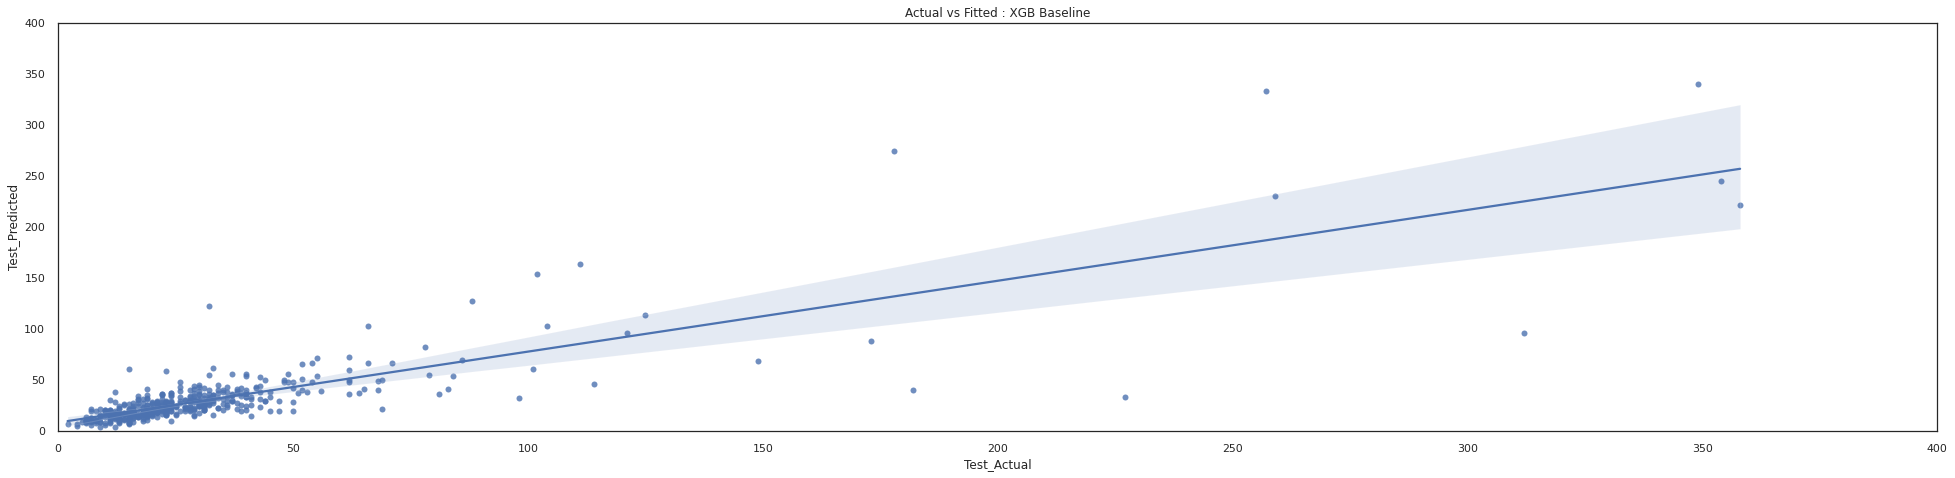

In [31]:
sns.set(rc={'figure.figsize':(30,7)})
sns.set_style("white")
ax = sns.regplot(x="Test_Actual", y="Test_Predicted", data=data_test_list[data_test_list.Model=='XGB Baseline'])
ax.set_xlim(0,400)
ax.set_ylim(0,400)
ax.set_title('Actual vs Fitted : XGB Baseline')

#### **XGB Baseline : Residual PLot**

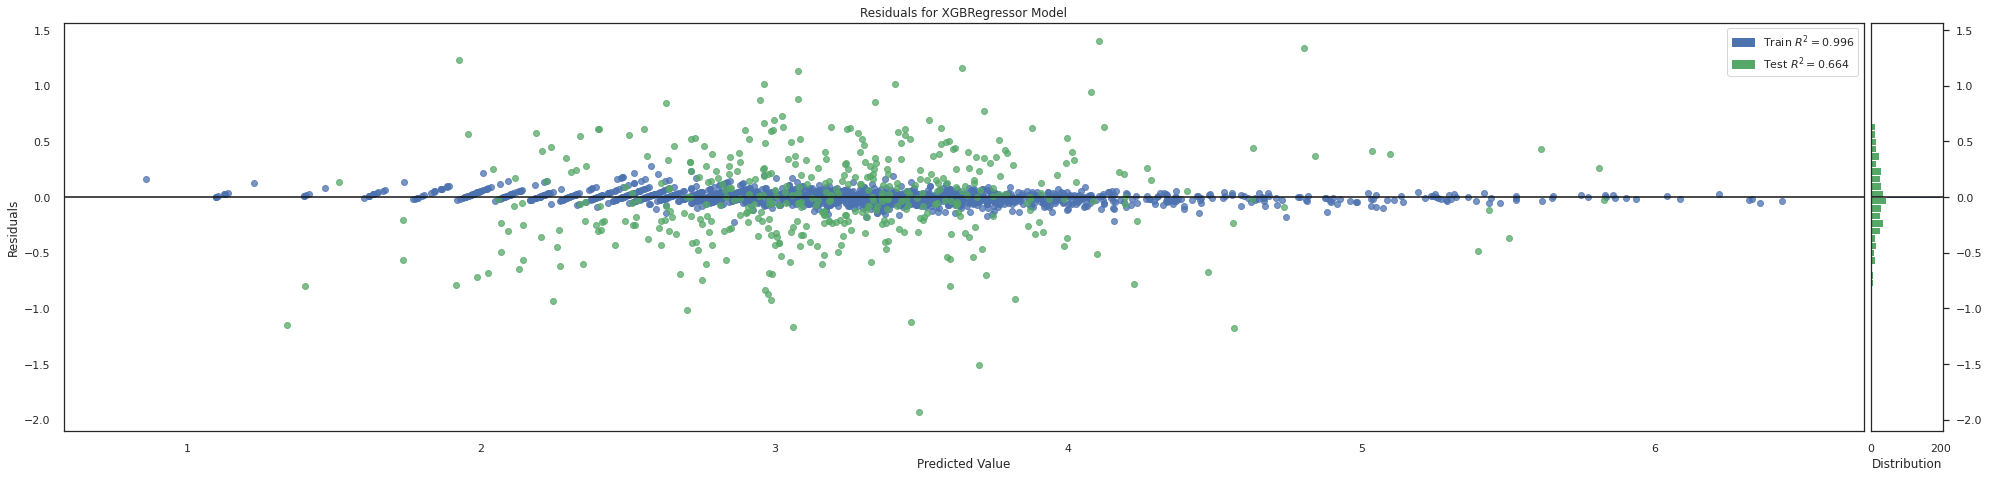

<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [32]:
sns.set(rc={'figure.figsize':(30,7)})
sns.set_style("white")

visualizer = ResidualsPlot(xg_base)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.show()                 # Finalize and render the figure

#### **XGB Parameters**

In [34]:
xg_rs = xgb.XGBRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(xg_base.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'objective': 'reg:squarederror',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}


#### **Random Search Training**
- The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively)
- More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental.

In [35]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 30, stop = 500, num = 20)]

# Learning rate
learning_rate = [x for x in np.linspace(start = 0.1, stop = 1, num = 10)]
 
# Depth
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]

one_to_left = st.beta(10, 1)  

from_zero_positive = st.expon(0, 50)

params = {  
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'colsample_bytree': one_to_left,
    'subsample': one_to_left,
    'gamma': st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    'min_child_weight': from_zero_positive,
}

pprint(params)

{'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f95f4311550>,
 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f95f45b3dd0>,
 'learning_rate': [0.1,
                   0.2,
                   0.30000000000000004,
                   0.4,
                   0.5,
                   0.6,
                   0.7000000000000001,
                   0.8,
                   0.9,
                   1.0],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f95f4311b10>,
 'n_estimators': [30,
                  54,
                  79,
                  104,
                  128,
                  153,
                  178,
                  203,
                  227,
                  252,
                  277,
                  302,
                  326,
                  351,
                  376,
                  401,
                  425,
                  45

In [36]:
%%time

# Use the random grid to search for best hyperparameters
# First create the base model to tune
xg_rand = xgb.XGBRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xgb_random = RandomizedSearchCV(estimator = xg_rand, param_distributions = params, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_absolute_error', n_iter = 50)

# Fit the random search model
xgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   20.6s finished


CPU times: user 1.91 s, sys: 156 ms, total: 2.07 s
Wall time: 21.7 s


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f95f4311b10>,
                                        'n_estimators': [3

In [37]:
print(xgb_random.best_params_)

{'colsample_bytree': 0.9252155845351104, 'gamma': 1.5601864044243652, 'learning_rate': 0.30000000000000004, 'max_depth': 14, 'min_child_weight': 2.991938430434034, 'n_estimators': 104, 'reg_alpha': 7.708098373328053, 'subsample': 0.9937572296628479}


#### **Building Random Search Best Model**

In [38]:
xgb_rs = xgb.XGBRegressor()
xgb_rs.set_params(**xgb_random.best_params_)

xgb_rs.fit(X_train, y_train)

y_train_pred = xgb_rs.predict(X_train)
y_train_pred = np.exp(y_train_pred)

y_test_pred = xgb_rs.predict(X_test)
y_test_pred = np.exp(y_test_pred)

y_train = np.exp(y_train)
y_test = np.exp(y_test)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = rmse(y_train,y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)
adj_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
                   
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = rmse(y_test,y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test,y_test_pred)
r2_test = r2_score(y_test,y_test_pred)
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

data_train = pd.DataFrame({'Model':'XGB Random Search', 'Train_Predicted': list(y_train_pred),'Train_Actual': list(y_train) })
data_train_list = data_train_list.append(data_train)
data_train_list.reset_index(drop=True, inplace=True)

data_test = pd.DataFrame({'Model':'XGB Random Search', 'Test_Predicted': list(y_test_pred),'Test_Actual': list(y_test)})
data_test_list = data_test_list.append(data_test)
data_test_list.reset_index(drop=True, inplace=True)

model_result_df.loc[i] = ['XGB Random Search', mse_train, rmse_train, mae_train, mape_train, r2_train,adj_r2_train, mse_test, rmse_test, mae_test, mape_test, r2_test,adj_r2_test]
i = i + 1

In [39]:
model_result_df.head()

,MODEL_NAME,TRAIN_MSE,TRAIN_RMSE,TRAIN_MAE,TRAIN_MAPE,TRAIN_R2,TRAIN__Adj_R2,TEST_MSE,TEST_RMSE,TEST_MAE,TEST_MAPE,TEST_R2,Test__Adj_R2
0,XGB Baseline,5.405687,2.325013,1.208627,3.539997,0.997836,0.997806,524.677044,22.905830,10.371614,32.761892,0.692846,0.688505
1,XGB Random Search,937.542187,30.619311,11.233172,29.760504,0.624699,0.619396,596.513875,24.423634,10.665047,33.776593,0.650791,0.645856


In [40]:
y_train = np.log(y_train)
y_test = np.log(y_test)

#### **XGB Random Search: Actual vs Fitted PLot**

Text(0.5, 1.0, 'Actual vs Fitted : XGB Random Search')

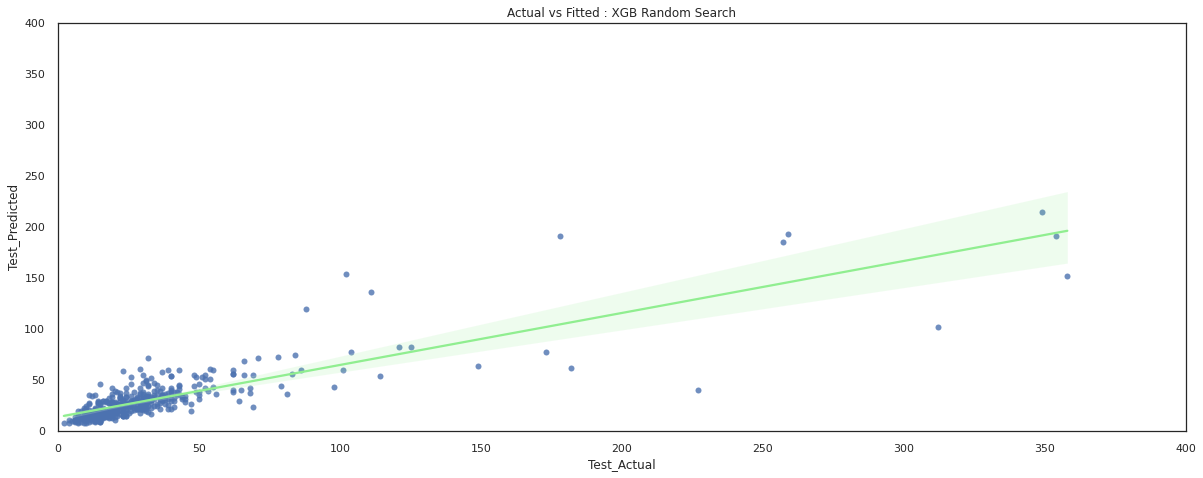

In [42]:
sns.set(rc={'figure.figsize':(18,7)})
sns.set_style("white")
ax = sns.regplot(x="Test_Actual", y="Test_Predicted", data=data_test_list[data_test_list.Model=='XGB Random Search'], line_kws={"color": "lightgreen"})
ax.set_xlim(0,400)
ax.set_ylim(0,400)
ax.set_title('Actual vs Fitted : XGB Random Search')

#### **Random Forest Random Search: Residual PLot**

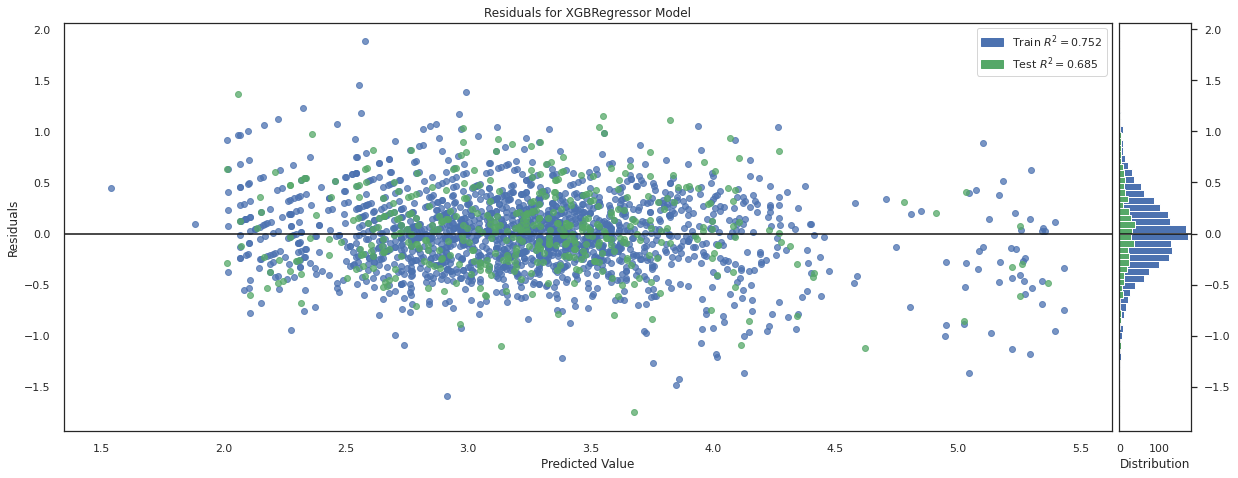

<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [43]:
sns.set(rc={'figure.figsize':(18,7)})
sns.set_style("white")

visualizer = ResidualsPlot(xgb_rs)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.show()                 # Finalize and render the figure

#### **Grid Search with Cross Validation**
- Random search allowed us to narrow down the range for each hyperparameter
- Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try
- We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define.

In [44]:
%%time

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
parameters = {  
    'n_estimators': [90, 110, 130, 150],
    'max_depth': [10, 16, 22],
    'learning_rate': [0.25, 0.3, 0.35],
    'gamma': [1.45, 1.55, 1.60],
}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
xg_grid = xgb.XGBRegressor()

# Instantiate the grid search model
xgb_grid = GridSearchCV(estimator = xg_grid, param_grid = parameters, cv = 3, n_jobs = -1, verbose = 1, scoring='neg_mean_absolute_error')

# Fit the grid search to the data
xgb_grid.fit(X_train, y_train)

print("Best Paramters for Random Forest Model using Grid Search:")
print(xgb_grid.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.2min finished


Best Paramters for Random Forest Model using Grid Search:
{'gamma': 1.45, 'learning_rate': 0.25, 'max_depth': 10, 'n_estimators': 150}
CPU times: user 2.97 s, sys: 178 ms, total: 3.15 s
Wall time: 1min 14s


#### **Building Grid Search Best Model**

In [45]:
xgb_gs = xgb.XGBRegressor()
xgb_gs.set_params(**xgb_grid.best_params_)

xgb_gs.fit(X_train, y_train)

y_train_pred = xgb_gs.predict(X_train)
y_train_pred = np.exp(y_train_pred)

y_test_pred = xgb_gs.predict(X_test)
y_test_pred = np.exp(y_test_pred)

y_train = np.exp(y_train)
y_test = np.exp(y_test)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = rmse(y_train,y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)
adj_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
                   
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = rmse(y_test,y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test,y_test_pred)
r2_test = r2_score(y_test,y_test_pred)
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

data_train = pd.DataFrame({'Model':'XGB Grid Search', 'Train_Predicted': list(y_train_pred),'Train_Actual': list(y_train) })
data_train_list = data_train_list.append(data_train)
data_train_list.reset_index(drop=True, inplace=True)

data_test = pd.DataFrame({'Model':'XGB Grid Search', 'Test_Predicted': list(y_test_pred),'Test_Actual': list(y_test)})
data_test_list = data_test_list.append(data_test)
data_test_list.reset_index(drop=True, inplace=True)

model_result_df.loc[i] = ['XGB Grid Search', mse_train, rmse_train, mae_train, mape_train, r2_train,adj_r2_train, mse_test, rmse_test, mae_test, mape_test, r2_test,adj_r2_test]
i = i + 1

In [46]:
model_result_df.head()

,MODEL_NAME,TRAIN_MSE,TRAIN_RMSE,TRAIN_MAE,TRAIN_MAPE,TRAIN_R2,TRAIN__Adj_R2,TEST_MSE,TEST_RMSE,TEST_MAE,TEST_MAPE,TEST_R2,Test__Adj_R2
0,XGB Baseline,5.405687,2.325013,1.208627,3.539997,0.997836,0.997806,524.677044,22.905830,10.371614,32.761892,0.692846,0.688505
1,XGB Random Search,937.542187,30.619311,11.233172,29.760504,0.624699,0.619396,596.513875,24.423634,10.665047,33.776593,0.650791,0.645856
2,XGB Grid Search,546.195449,23.370825,9.225953,25.263128,0.781357,0.778267,561.979079,23.706098,10.320690,31.284979,0.671009,0.666359


In [ ]:
data_train_list.to_csv('gs://aes-datahub-0002-curated/Outage_Restoration/DPL_Curated_Datasets/Train_Data_DPL_RF_DSB_10222020.csv')
data_test_list.to_csv('gs://aes-datahub-0002-curated/Outage_Restoration/DPL_Curated_Datasets/Test_Data_DPL_RF_DSB_10222020.csv')

In [47]:
y_train = np.log(y_train)
y_test = np.log(y_test)

#### **Random Forest Grid Search: Actual vs Fitted Plot**

Text(0.5, 1.0, 'Actual vs Fitted : XGB Grid Search CV')

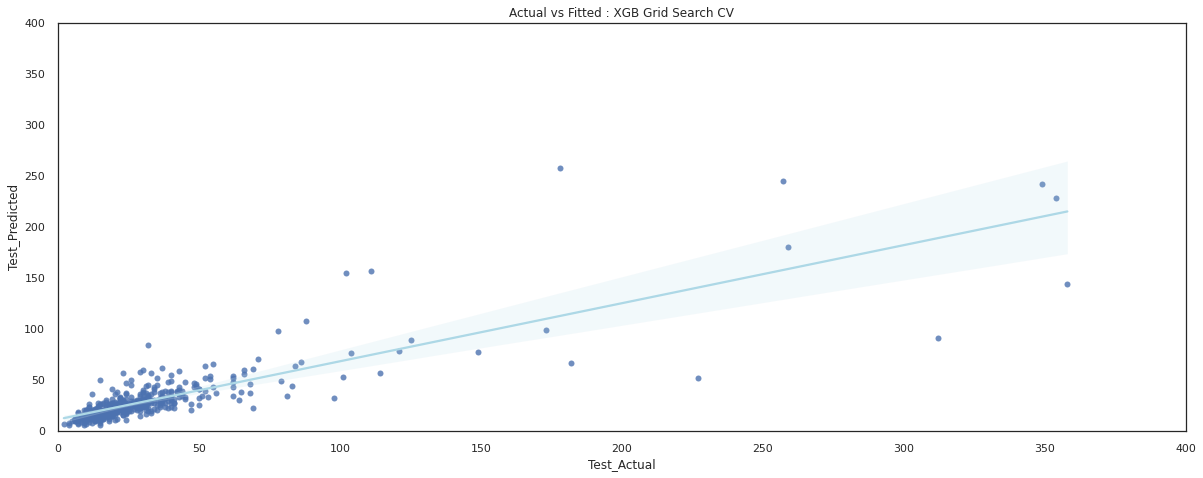

In [49]:
ax = sns.regplot(x="Test_Actual", y="Test_Predicted", data=data_test_list[data_test_list.Model=='XGB Grid Search'], line_kws={"color": "lightblue"})
ax.set_xlim(0,400)
ax.set_ylim(0,400)
ax.set_title('Actual vs Fitted : XGB Grid Search CV')

#### **Random Forest Grid Search: Residual PLot**

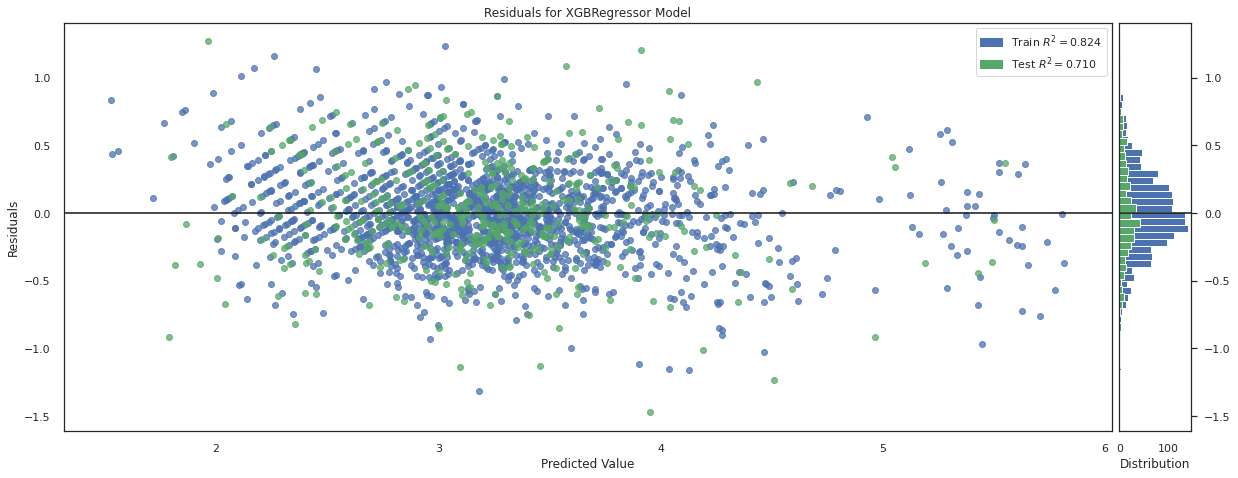

<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [50]:
sns.set(rc={'figure.figsize':(18,7)})
sns.set_style("white")

visualizer = ResidualsPlot(xgb_gs)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.show()                 # Finalize and render the figure

#### **Selecting the best model**

In [51]:
model_result_df

,MODEL_NAME,TRAIN_MSE,TRAIN_RMSE,TRAIN_MAE,TRAIN_MAPE,TRAIN_R2,TRAIN__Adj_R2,TEST_MSE,TEST_RMSE,TEST_MAE,TEST_MAPE,TEST_R2,Test__Adj_R2
0,XGB Baseline,5.405687,2.325013,1.208627,3.539997,0.997836,0.997806,524.677044,22.905830,10.371614,32.761892,0.692846,0.688505
1,XGB Random Search,937.542187,30.619311,11.233172,29.760504,0.624699,0.619396,596.513875,24.423634,10.665047,33.776593,0.650791,0.645856
2,XGB Grid Search,546.195449,23.370825,9.225953,25.263128,0.781357,0.778267,561.979079,23.706098,10.320690,31.284979,0.671009,0.666359


#### **Model business metric**

In [52]:
xgb_gs.fit(X_train, y_train)

y_train_pred = xgb_gs.predict(X_train)
y_train_pred = np.exp(y_train_pred)

y_test_pred = xgb_gs.predict(X_test)
y_test_pred = np.exp(y_test_pred)

y_train = np.exp(y_train)
y_test = np.exp(y_test)

# business_KPI = customer_metrics(y_test,y_test_pred)
# y_train = np.log(y_train)
# y_test = np.log(y_test)
# reorderlist = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '25000-30000', '>30000','total']
# df_percentage = np.round(business_KPI*100/business_KPI.iloc[-1, -1], 1)
# df_percentage['>30000'] = None
# df_percentage.reindex(reorderlist)[['0-5000', '5000-10000', '10000-15000', '15000-20000', '25000-30000','total']]


In [55]:
test_coll['Predicted'] = y_test_pred
test_coll['Actual'] = y_test

In [56]:
test_coll[(test_coll['Clear_Sky_True'] == 0)]

,windSpdAvg,Month_Cos,windChillMax,precip,Week_Cos,weekday_Saturday,spcHumMax,relHumMax,Week_Sin,weekday_Friday,sfcPresMin,heatIndexAvg,feelsLikeMax,Week,dewPtMax,wetBulbAvg,Clear_Sky_True,windSpd100mMax,radSolarMax,windSpd80mMax,wetBulbMax,windSpdMax,cldCvrMin,Clear_Sky_False,Weekend_flag_False,Date,Predicted,Actual
614,8.632203,-8.660254e-01,87.2,0.93,-0.935016,0,19.8,99.9,-0.354605,0,956.4,75.790113,94.9,29,75.7,69.735028,0,28.9,943.0,29.3,77.6,23.0,0.0,1,1,2015-07-14,227.733994,354.0
29,9.753933,-8.660254e-01,89.4,2.82,-0.970942,1,21.9,100.0,-0.239316,0,965.4,78.568539,103.7,28,78.8,70.726966,0,20.3,829.2,20.7,81.1,21.5,0.0,1,0,2008-07-12,257.425446,178.0
1955,6.007692,6.123234e-17,39.0,0.00,0.239316,1,3.4,84.0,0.970942,0,984.2,35.100000,39.0,11,29.0,31.576923,0,25.3,792.2,23.9,36.4,12.7,0.0,1,0,2019-03-16,17.431393,13.0
49,4.647115,-8.660254e-01,92.7,0.03,-0.970942,0,20.4,98.0,-0.239316,0,968.2,84.746474,102.3,28,76.7,73.550000,0,10.8,956.2,11.3,79.7,12.0,0.0,1,1,2011-07-12,91.059288,312.0
18,13.609653,-8.660254e-01,86.7,1.10,-0.885456,1,15.7,100.0,0.464723,0,961.8,74.298842,87.5,22,69.2,66.233591,0,28.7,971.3,28.7,71.8,28.5,0.0,1,0,2008-05-31,179.694382,259.0
25,9.682955,-1.000000e+00,85.0,0.10,-0.992709,0,14.2,100.0,0.120537,0,963.4,71.359091,85.4,25,66.1,64.095455,0,15.9,964.1,15.9,70.4,22.0,2.0,1,1,2008-06-16,107.846397,88.0
52,6.727654,-1.836970e-16,77.8,1.53,-0.464723,0,17.1,100.0,-0.885456,0,964.8,69.524860,81.2,35,71.8,67.121788,0,14.2,770.7,14.5,72.4,16.2,37.0,1,0,2011-09-04,143.557938,358.0
45,14.233524,-8.660254e-01,83.0,1.45,-0.822984,0,14.9,100.0,0.568065,0,961.3,70.341834,85.6,21,67.3,65.190831,0,23.5,949.8,23.9,71.7,31.1,0.0,1,1,2011-05-23,242.280472,349.0
2244,9.220588,8.660254e-01,66.0,0.65,0.970942,1,11.4,98.0,0.239316,0,961.4,58.427451,66.0,2,60.2,55.889216,0,34.3,394.0,39.2,61.6,24.8,0.0,1,0,2020-01-11,154.935272,102.0
50,4.721012,-8.660254e-01,92.0,1.52,-0.935016,0,21.5,99.6,-0.354605,0,968.2,81.212451,105.0,29,78.4,73.361479,0,11.2,926.3,11.5,81.0,19.9,0.0,1,0,2011-07-24,245.047592,257.0


In [57]:
test_coll.to_csv('gs://aes-datahub-0002-curated/Outage_Restoration/DPL_Curated_Datasets/6_Outages_XGB_Test.csv')

#### **Saving Model Object using Pickle File**

In [ ]:
import gcsfs

fs = gcsfs.GCSFileSystem(project='aes-datahub-0002')
fs.ls('aes-datahub-0002-curated/Outage_Restoration/Historical_Data/PickleFiles')
with fs.open('aes-datahub-0002-curated/Outage_Restoration/Historical_Data/PickleFiles/DPL_RF_baseline_DSB_10222020.pkl', 'wb') as f:
    pickle.dump(rf_base, f)

#### **Load Model Object using Pickle File**

In [ ]:
import gcsfs

fs = gcsfs.GCSFileSystem(project='aes-datahub-0002')

with fs.open('aes-datahub-0002-curated/Outage_Restoration/Historical_Data/PickleFiles/DPL_RF_baseline_NorthDayton_10212020.pkl', 'rb') as f:
    rf_model = pickle.load(f)

#### **Out of Sample Validation**

In [ ]:
df_all = pd.read_csv('gs://aes-datahub-0002-curated/Outage_Restoration/DPL_test_dataset/North Dayton.csv')
df_all.tail()

In [ ]:
# df_all_req = df_all[['TTR','TIME_OF_FIRST_CALL','RANK_SUBSEQUENT_OTG', 'Hour_Cos', 'Nearest_service_center_Greenville', 'sfcPresMin', 'WIREDOWN_PTP_True', 'DAMAGEDTRANS_False', 'PRIORITY_True', 'Contractor', 'Outages_in_last_10hr', 'windSpdMax', 'Outages_in_last_2hr', 'Outages_in_last_5hr', 'Total_Crew_available', 'Min_Distance_service_Center', 'CONFIDENCE_H', 'mslPresMin', 'WIREDOWN_PTP_False', 'heatIndexMax', 'Outages_in_last_3hr', 'Weekend_flag_False', 'TREEONWIRE_PTH_True', 'relHumMax', 'PRIORITY_False', 'BROKENPOLE_True', 'DEVICETYPE_PMH', 'windDirAvg', 'weekday_Saturday', 'Outages_in_last_9hr', 'radSolarMax', 'windSpd80mMax', 'WIREDOWN_PTH_True', 'DEVICETYPE_F RISER', 'rank_cd', 'TOPFUSE_False', 'DEVICETYPE_SWTCHGEAR', 'Outages_in_last_1hr', 'Total_Crew_dispatched', 'windSpdRange', 'windSpd80mAvg', 'DAMAGEDTRANS_True', 'snowfall', 'spcHumMin', 'WIREDOWN_PTH_False', 'heatIndexAvg', 'TREEONWIRE_PTP_False', 'Nearest_service_center_North Dayton', 'Outages_in_last_4hr', 'sfcPresRatio', 'CONFIDENCE_L', 'Nearest_service_center_DSB', 'windChillAvg', 'tempRange', 'relHumRatio', 'rank', 'Substation_crew', 'relHumAvg', 'Nearest_service_center_Marysville', 'precip', 'sfcPresMax', 'Nearest_service_center_Sidney', 'ACCOUNT_TYPE_RES_False', 'BROKENPOLE_False']]

##### *2020 Data Validation*

In [ ]:
storm_col = ['MODEL_NAME' , 'TEST_MSE', 'TEST_RMSE', 'TEST_MAE', 'TEST_MAPE', 'TEST_R2']
storm_result_df = pd.DataFrame(columns=storm_col)
storm_test_list = pd.DataFrame() 
i=0

In [ ]:
df_all['customers_tot'] = df_all['Customers']
df_all = pd.get_dummies(df_all, columns=['FIREEXPLOSION', 'ACCOUNT_TYPE_COM', 'ACCOUNT_TYPE_CUS', 'ACCOUNT_TYPE_GOV', 'ACCOUNT_TYPE_IND'])
df_all['ACCOUNT_TYPE_CUS_True'] = 0

In [ ]:
X = df_all[final_features]
y = np.log(df_all.TTR)

y_test_pred = rf_model.predict(X)
y_test_pred = np.exp(y_test_pred)

y = np.exp(y)

mse_test = mean_squared_error(y, y_test_pred)
rmse_test = rmse(y,y_test_pred)
mae_test = mean_absolute_error(y, y_test_pred)
mape_test = mean_absolute_percentage_error(y,y_test_pred)
r2_test = r2_score(y,y_test_pred)

data_test = pd.DataFrame({'Model':'2020 Validation', 'Test_Predicted': list(y_test_pred),'Test_Actual': list(y)})
storm_test_list = storm_test_list.append(data_test)
storm_test_list.reset_index(drop=True, inplace=True)

storm_result_df.loc[i] = ['2020 Validation', mse_test, rmse_test, mae_test, mape_test, r2_test]
i = i + 1

In [ ]:
ax = sns.regplot(x="Test_Actual", y="Test_Predicted", data=storm_test_list[storm_test_list.Model=='2020 Validation'], line_kws={"color": "lightblue"})
ax.set_xlim(0,2700)
ax.set_ylim(0,2700)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Fitted : 2020 Validation')

In [ ]:
storm_test_list.to_csv('gs://aes-datahub-0002-curated/Outage_Restoration/DPL_Curated_Datasets/RF_Model_2020_Results_North_dayton.csv')

In [ ]:
storm_result_df